<a href="https://colab.research.google.com/github/FlamingoLindo/spotify-svm/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [ ]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/UMC-Age-of-Empires-2/Branch-VitorFerreira/spotify.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df = df[(df['track_genre'].isin(['brazil','mpb','pagode','samba','sertanejo']))]
print(df)

       Unnamed: 0                track_id                           artists  \
9000         9000  6GomT970rCOkKAyyrwJeZi                     Öwnboss;Sevek   
9001         9001  7DFIPUWRKwOB8RWky8ELq8                          BK;JXNV$   
9002         9002  1JAqy8JxzsmMRq5jD2Oi49                          Liu;GenX   
9003         9003  2p9CY7YZIrkZLg4ztUCjZN                     Yago Oproprio   
9004         9004  1XqWGzOdE6Q6FgFwAg0t9R  Xamã;Bagua Records;Luccas Carlos   
...           ...                     ...                               ...   
97995       97995  6L7edR8ePoAiOEthSAfeBD                     Gerson Rufino   
97996       97996  0t9X7I69027UILQB4WYCai                Chico Rey & Paraná   
97997       97997  6nYIAevQfh7QhuQYXYLy50                     Léo & Raphael   
97998       97998  7ALQOUgUrUifvmcGMCyvld                       Os Serranos   
97999       97999  23iyR47eBWtYZPWReCbAfy               João Paulo & Daniel   

                                             album_

In [ ]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 9000  9001  9002 ... 97997 97998 97999]
Quantidade de valores unicos 5000 

Valores unícos em track_id: ['6GomT970rCOkKAyyrwJeZi' '7DFIPUWRKwOB8RWky8ELq8'
 '1JAqy8JxzsmMRq5jD2Oi49' ... '6nYIAevQfh7QhuQYXYLy50'
 '7ALQOUgUrUifvmcGMCyvld' '23iyR47eBWtYZPWReCbAfy']
Quantidade de valores unicos 4317 

Valores unícos em artists: ['Öwnboss;Sevek' 'BK;JXNV$' 'Liu;GenX' ...
 'George Henrique & Rodrigo;Jorge & Mateus'
 'Conrado & Aleksandro;Bruno & Barretto' 'Cezar & Paulinho']
Quantidade de valores unicos 1546 

Valores unícos em album_name: ['Move Your Body' 'Castelos & Ruínas' 'Pirate' ... 'Os Grandes Sucessos'
 'Os Serranos Interpretam Sucessos Gaúchos, Vol. 3' 'Volume 8']
Quantidade de valores unicos 2569 

Valores unícos em track_name: ['Move Your Body' 'Amores, Vícios e Obsessões' 'Pirate' ...
 'Velha Porteira' 'Aqui É Parana Cunhado' 'O Casamento de Doralice']
Quantidade de valores unicos 4064 

Valores unícos em popularity: [82 56 54 57 52 55 53 58  0  1 

In [ ]:
train_df = df.copy()

In [ ]:
train_df.drop([ 'Unnamed: 0', 'track_id'], axis=1, inplace=True)
train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
9000,Öwnboss;Sevek,Move Your Body,Move Your Body,82,157444,False,0.848,0.821,2,-5.408,0,0.0527,0.01690,0.000403,0.0962,0.249,125.051,4,brazil
9001,BK;JXNV$,Castelos & Ruínas,"Amores, Vícios e Obsessões",56,194478,False,0.833,0.517,11,-7.502,0,0.3010,0.11600,0.000142,0.1160,0.187,129.047,4,brazil
9002,Liu;GenX,Pirate,Pirate,54,221775,False,0.720,0.781,10,-2.647,0,0.0609,0.00408,0.807000,0.3080,0.307,125.005,4,brazil
9003,Yago Oproprio,Helipa,Helipa,57,202213,False,0.692,0.427,11,-10.733,0,0.3910,0.52700,0.000000,0.1700,0.542,75.086,4,brazil
9004,Xamã;Bagua Records;Luccas Carlos,O Iluminado,Uma Linda Mulher,54,208000,True,0.704,0.616,6,-7.042,0,0.0818,0.29900,0.000000,0.0856,0.161,89.974,4,brazil


In [ ]:
train_df.isna().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
train_df.dropna(inplace=True)
train_df.isna().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
train_df = train_df.sample(250)
train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74032,Vander Lee,9,Esperando Aviões,49,222720,False,0.592,0.370,7,-9.482,0,0.0318,0.817000,0.000057,0.1070,0.209,139.862,4,mpb
97120,Chico Rey & Paraná,"Sucessos de Ouro, Vol. 15",Espinho Na Cama,51,154600,False,0.679,0.565,8,-5.516,1,0.0294,0.203000,0.000000,0.3590,0.696,98.226,3,sertanejo
97864,Max e Luan;João Gustavo e Murilo,Beijo Saliente,Beijo Saliente,45,157666,True,0.788,0.564,9,-5.767,1,0.1170,0.328000,0.000000,0.1040,0.458,113.980,4,sertanejo
9950,Armored Dawn,S.O.S.,S.O.S.,54,227894,False,0.541,0.971,10,-3.323,0,0.0880,0.000028,0.005200,0.0837,0.360,107.949,4,brazil
9205,Don L,Roteiro pra Aïnouz (Vol. 2),enquanto recomeça,48,187504,False,0.686,0.637,1,-6.821,0,0.0737,0.057000,0.004510,0.1890,0.214,146.067,4,brazil


In [ ]:
le = LabelEncoder()

train_df['artists'] = le.fit_transform(train_df['artists'])

train_df['album_name'] = le.fit_transform(train_df['album_name'])

train_df['track_name'] = le.fit_transform(train_df['track_name'])

train_df['track_genre'] = le.fit_transform(train_df['track_genre'])

train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74032,177,5,92,49,222720,False,0.592,0.370,7,-9.482,0,0.0318,0.817000,0.000057,0.1070,0.209,139.862,4,1
97120,27,197,93,51,154600,False,0.679,0.565,8,-5.516,1,0.0294,0.203000,0.000000,0.3590,0.696,98.226,3,4
97864,124,39,30,45,157666,True,0.788,0.564,9,-5.767,1,0.1170,0.328000,0.000000,0.1040,0.458,113.980,4,4
9950,11,182,201,54,227894,False,0.541,0.971,10,-3.323,0,0.0880,0.000028,0.005200,0.0837,0.360,107.949,4,0
9205,44,181,245,48,187504,False,0.686,0.637,1,-6.821,0,0.0737,0.057000,0.004510,0.1890,0.214,146.067,4,0


In [ ]:
train_df.drop(['artists', 'album_name','track_name','track_genre'], axis=1, inplace=True)
train_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
74032,49,222720,False,0.592,0.370,7,-9.482,0,0.0318,0.817000,0.000057,0.1070,0.209,139.862,4
97120,51,154600,False,0.679,0.565,8,-5.516,1,0.0294,0.203000,0.000000,0.3590,0.696,98.226,3
97864,45,157666,True,0.788,0.564,9,-5.767,1,0.1170,0.328000,0.000000,0.1040,0.458,113.980,4
9950,54,227894,False,0.541,0.971,10,-3.323,0,0.0880,0.000028,0.005200,0.0837,0.360,107.949,4
9205,48,187504,False,0.686,0.637,1,-6.821,0,0.0737,0.057000,0.004510,0.1890,0.214,146.067,4


In [ ]:
X = train_df.drop('popularity', axis=1)
y = train_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

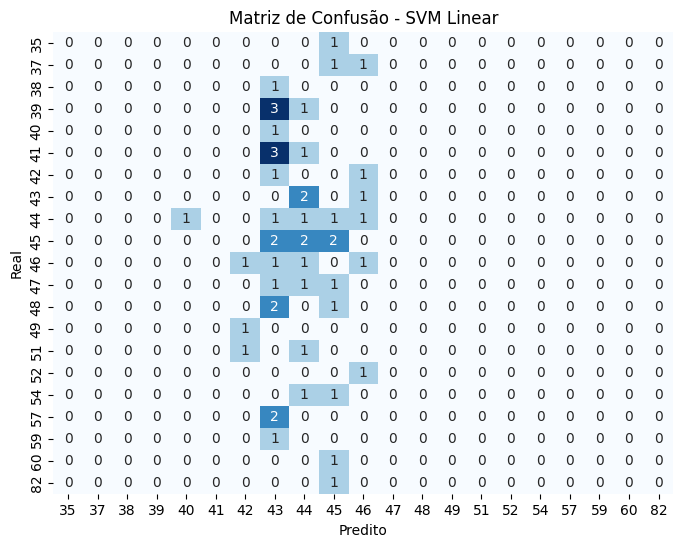

              precision    recall  f1-score   support

          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         4
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         4
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         3
          44       0.09      0.20      0.12         5
          45       0.20      0.33      0.25         6
          46       0.17      0.25      0.20         4
          47       0.00      0.00      0.00         3
          48       0.00      0.00      0.00         3
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         2
          57       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

#https://scikit-learn.org/dev/modules/model_evaluation.html#matthews-correlation-coefficient
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Fitting 2 folds for each of 270 candidates, totalling 540 fits


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [ ]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=0.01, degree=2, gamma=1, probability=True)


In [ ]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.06


<Figure size 640x480 with 0 Axes>

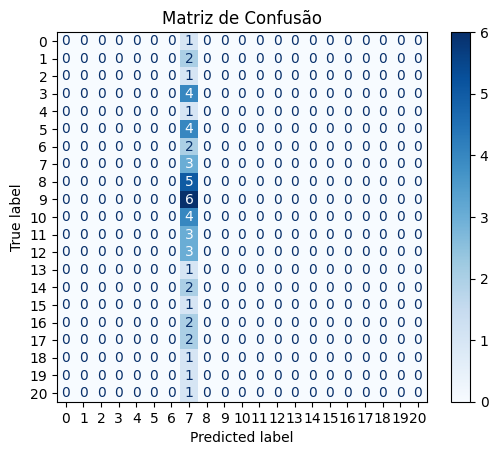

              precision    recall  f1-score   support

          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         4
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         4
          42       0.00      0.00      0.00         2
          43       0.06      1.00      0.11         3
          44       0.00      0.00      0.00         5
          45       0.00      0.00      0.00         6
          46       0.00      0.00      0.00         4
          47       0.00      0.00      0.00         3
          48       0.00      0.00      0.00         3
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         2
          57       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_test, y_pred))

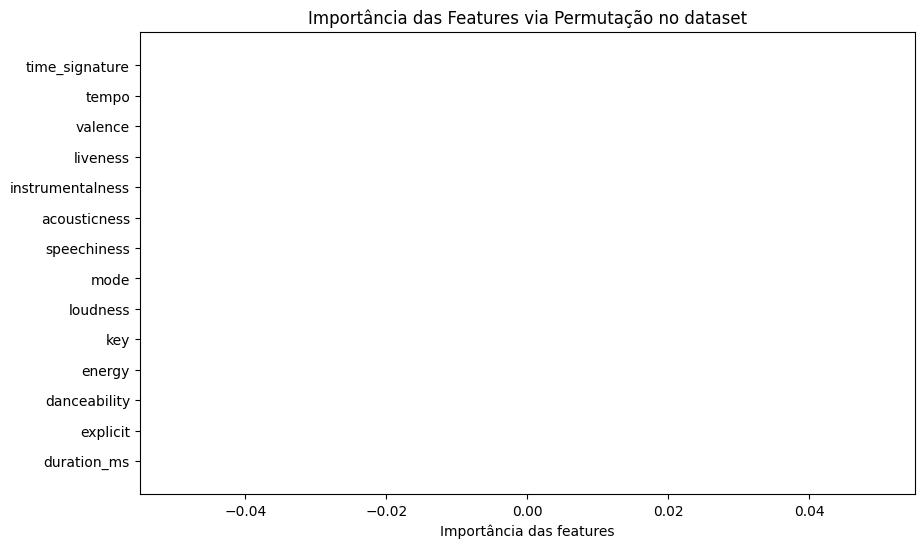

In [ ]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
plt.show()

In [ ]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                  Falsos positivos  Falsos Negativos  \
duration_ms                    NaN               NaN   
explicit                       NaN               NaN   
danceability                   NaN               NaN   
energy                         NaN               NaN   
key                            NaN               NaN   
loudness                       NaN               NaN   
mode                           NaN               NaN   
speechiness                    NaN               NaN   
acousticness                   NaN               NaN   
instrumentalness               NaN               NaN   
liveness                       NaN               NaN   
valence                        NaN               NaN   
tempo                          NaN               NaN   
time_signature                 NaN               NaN   

                  Classificados corretamente  
duration_ms                    285334.666667  
explicit                       